In [ ]:
import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T


In [ ]:
env = gym.make('MountainCar-v0')
env.reset()
for _ in range(1000):
    #env.render()
    env.step(env.action_space.sample()) #take a random action
env.close()

In [ ]:
def getHeight(x_position):
    return np.sin(3 * x_position) * .45 + .55

In [ ]:
def newreward(pos):
    if(pos >= 0.5):
        return 2
    else:
        return (pos + 1.2)/1.8 -1


In [ ]:
#define Q-learning function
def QLearning(env, learning , epsilon, min_eps, episodes):
    # Determine size of discretised state space
    num_states = (env.observation_space.high - env.observation_space.low)*np.array([10,50])
    num_states = np.round(num_states,0).astype(int)+1

    # Initialise Q-table
    Q = np.random.uniform(low = -1,high = 0, size = (num_states[0],num_states[1],env.action_space.n))
    Qinit = np.copy(Q)

    # Initialise variables to track rewards
    reward_list = []
    ave_reward_list = []

    # Make copy of epsilon
    eps1 = epsilon

    # Keep track of first success
    first = episodes + 1

    # Run Q learning algorithms
    for i in range(episodes):
        # Initialise parameters
        done = False
        tot_reward, reward = 0,0
        state = env.reset()

        # Discretize states
        state_adj = (state - env.observation_space.low)*np.array([10,50])
        state_adj = np.round(state_adj,0).astype(int)

        while done != True:
            # Render environment for last few episodes
            if i >= (episodes-5) or i<5:
                env.render()

            # Determin next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]])
            else:
                action = np.random.randint(0,env.action_space.n)

            # Get next state and reward
            state2,reward,done,info = env.step(action)

            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10,50])
            state2_adj = np.round(state2_adj,0).astype(int)

            # Save to Qpoints
            row = np.array([state_adj[0],state_adj[1],action])

            # Allow for terminal states
            if done and state2[0] >= 0.5 :
                Q[state_adj[0],state_adj[1],action] = reward

            # Adjust Q value for current state
            else :
                delta = learning*(newreward(state2[0]) + np.max(Q[state2_adj[0], state2_adj[1]]) - Q[state_adj[0],state_adj[1],action])
                Q[state_adj[0],state_adj[1],action] += delta

            # Notifies of any clears
            if state2[0]>=0.5 or i<first:
                first = i
                print('Clear on episode {}'.format(i+1))

            # Update avriables
            tot_reward += newreward(state2[0])
            state_adj = state2_adj

        # Deacy epsilon
        if epsilon > min_eps:
            epsilon *= eps1

        # Track Rewards
        reward_list.append(tot_reward)

        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []

        if (i+1) % 100 == 0:
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))

    env.close()

    return ave_reward_list, Q, Qinit

In [ ]:
# Run Q learning algorithm
env.reset()
rewards, Qpts, Qinit = QLearning(env,0.2,0.9,0,1000)

Clear on episode 1
Clear on episode 71
Episode 100 Average Reward: -122.50987854007344
Clear on episode 188
Clear on episode 189
Clear on episode 190
Clear on episode 191
Clear on episode 192
Clear on episode 193
Clear on episode 194
Clear on episode 195
Clear on episode 196
Clear on episode 197
Clear on episode 198
Clear on episode 199
Clear on episode 200
Episode 200 Average Reward: -118.42854620248876
Clear on episode 201
Clear on episode 203
Clear on episode 205
Clear on episode 208
Clear on episode 209
Clear on episode 210
Clear on episode 211
Clear on episode 212
Clear on episode 228
Clear on episode 229
Clear on episode 230
Clear on episode 286
Clear on episode 288
Episode 300 Average Reward: -116.95912443647188
Clear on episode 330
Clear on episode 332
Clear on episode 333
Clear on episode 334
Clear on episode 335
Clear on episode 342
Clear on episode 344
Clear on episode 348
Clear on episode 349
Clear on episode 353
Clear on episode 354
Clear on episode 355
Clear on episode 36

Clear on episode 996
Clear on episode 997
Clear on episode 999
Clear on episode 1000
Episode 1000 Average Reward: -105.87684811112507


In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


Text(0.5, 1.0, 'Average Reward vs Episodes')

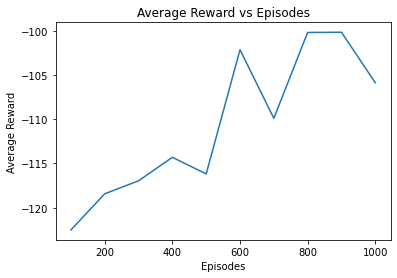

In [ ]:
plt.plot(100*(np.arange(len(rewards))+1),rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')

Iinitial action counts: [51 57 44]
Final action counts: [53 44 55]


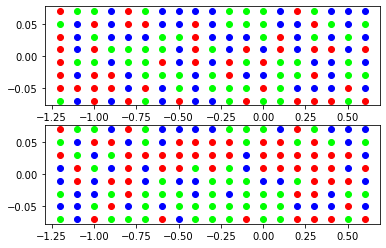

In [ ]:
colors = ['lime','blue','red']
labels = ['Left','Nothing','Right']
fig, (ax1,ax2) = plt.subplots(2)
colorcount2 = np.array([0,0,0])
colorcount = np.array([0,0,0])
for i in range(19):
    for j in range(8):
        maxdex2 = np.argmax(Qinit[i][j])
        ax1.plot(i/10-1.2,j/50-0.07,'o',color = colors[maxdex2])
        colorcount2[maxdex2] +=1
        maxdex = np.argmax(Qpts[i][j])
        ax2.plot(i/10-1.2,j/50-0.07,'o',color = colors[maxdex])
        colorcount[maxdex] +=1
print('Iinitial action counts: {}'.format(colorcount2))
print('Final action counts: {}'.format(colorcount))